In [1]:
import pandas as pd
import tensorflow as tf
%load_ext tensorboard

In [2]:
!rm -rf ./logs/ 

In [3]:
data = pd.read_csv('../fashionmnist/fashion-mnist_train.csv')

In [4]:
pixels = [f'pixel{i}' for i in range(1,785)]
y = data['label'].values
X = data[pixels].values
X = X/255
X = X.astype(dtype='float32')
y = tf.keras.utils.to_categorical(y,num_classes=10)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [7]:
model_lr = Sequential()
model_lr.add( Dense(10, input_shape=(784,),activation='softmax'))
model_lr.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy']
                )

In [8]:
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [9]:
model_lr_fit = model_lr.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32, 
    validation_data=(X_test,y_test),
    callbacks=[tensorboard_callback]
)


Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 7s 151us/step - loss: 0.6407 - accuracy: 0.7837 - val_loss: 0.5077 - val_accuracy: 0.8244
Epoch 2/10
45000/45000 [==============================] - 6s 132us/step - loss: 0.4813 - accuracy: 0.8350 - val_loss: 0.4592 - val_accuracy: 0.8409
Epoch 3/10
45000/45000 [==============================] - 6s 129us/step - loss: 0.4498 - accuracy: 0.8443 - val_loss: 0.4598 - val_accuracy: 0.8390
Epoch 4/10
45000/45000 [==============================] - 6s 128us/step - loss: 0.4337 - accuracy: 0.8498 - val_loss: 0.4411 - val_accuracy: 0.8435
Epoch 5/10
45000/45000 [==============================] - 6s 131us/step - loss: 0.4225 - accuracy: 0.8543 - val_loss: 0.4369 - val_accuracy: 0.8495
Epoch 6/10
45000/45000 [==============================] - 6s 131us/step - loss: 0.4150 - accuracy: 0.8559 - val_loss: 0.4420 - val_accuracy: 0.8450
Epoch 7/10
45000/45000 [==============================] - 6s 

In [10]:
import matplotlib.pyplot as plt
def plot_history(histories, key='accuracy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('logistic regrission', model_lr_fit)])


In [11]:
model_mlp = Sequential()
model_mlp.add( Dense(256,input_shape=(784,), activation='relu') )
model_mlp.add( Dropout(0.5))
model_mlp.add( Dense(128, activation='relu') )
model_mlp.add( Dropout(0.5))
model_mlp.add(Dense(10,activation='softmax'))

In [12]:
model_mlp.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [13]:
model_mlp_fit = model_lr.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32, 
    validation_data=(X_test,y_test)
)

Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 5s 122us/step - loss: 0.3944 - accuracy: 0.8626 - val_loss: 0.4201 - val_accuracy: 0.8548
Epoch 2/10
45000/45000 [==============================] - 5s 117us/step - loss: 0.3902 - accuracy: 0.8646 - val_loss: 0.4205 - val_accuracy: 0.8548
Epoch 3/10
45000/45000 [==============================] - 5s 116us/step - loss: 0.3877 - accuracy: 0.8649 - val_loss: 0.4434 - val_accuracy: 0.8478
Epoch 4/10
45000/45000 [==============================] - 5s 117us/step - loss: 0.3858 - accuracy: 0.8645 - val_loss: 0.4250 - val_accuracy: 0.8526
Epoch 5/10
45000/45000 [==============================] - 5s 116us/step - loss: 0.3835 - accuracy: 0.8656 - val_loss: 0.4141 - val_accuracy: 0.8561
Epoch 6/10
45000/45000 [==============================] - 5s 115us/step - loss: 0.3825 - accuracy: 0.8664 - val_loss: 0.4183 - val_accuracy: 0.8548
Epoch 7/10
45000/45000 [==============================] - 5s 1

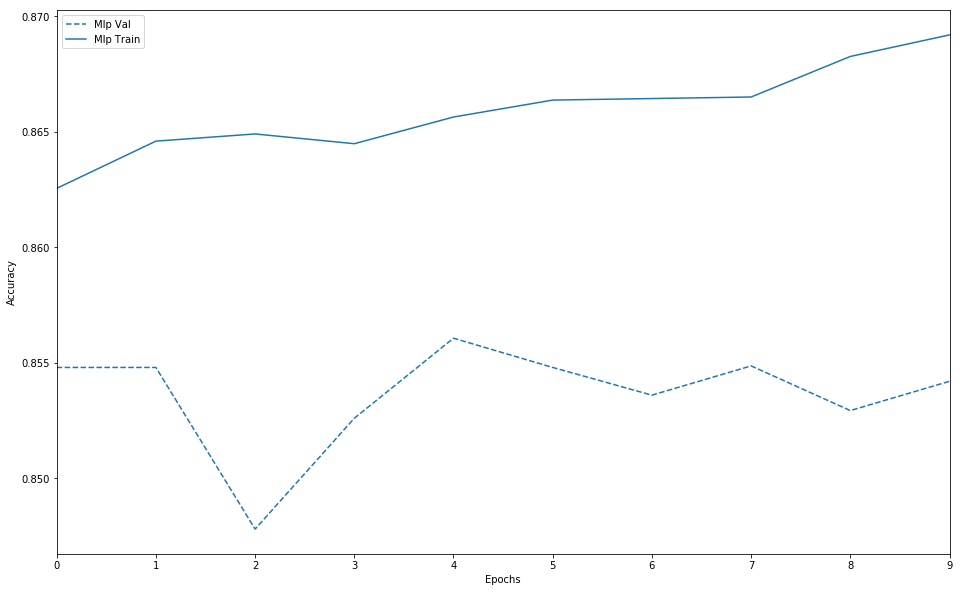

In [14]:
plot_history([('mlp', model_mlp_fit)])

In [15]:
from keras.layers import Flatten, Conv1D, MaxPool1D, BatchNormalization

In [16]:
model_vgg = Sequential()
model_vgg.add(Conv1D(64,3,activation='relu',input_shape=(784,1)))
model_vgg.add(Conv1D(64,3,activation='relu'))
model_vgg.add(MaxPool1D(pool_size=1))
model_vgg.add(Flatten())
model_vgg.add(Dense(256, activation='relu'))
model_vgg.add(Dropout(0.5))
model_vgg.add(Dense(10, activation='softmax'))

In [17]:
model_vgg.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
pixels = [f'pixel{i}' for i in range(1,785)]
y = data['label'].values
X = data[pixels].values
X = X/255
X = X.astype(dtype='float32')
y = tf.keras.utils.to_categorical(y,num_classes=10)

In [19]:
X = X.reshape((X.shape[0],784,1))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [21]:
model_vgg_fit = model_vgg.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32, 
    validation_data=(X_test,y_test)
)

Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 683s 15ms/step - loss: 0.4464 - accuracy: 0.8418 - val_loss: 0.3075 - val_accuracy: 0.8894
Epoch 2/10
45000/45000 [==============================] - 684s 15ms/step - loss: 0.3014 - accuracy: 0.8902 - val_loss: 0.2706 - val_accuracy: 0.9009
Epoch 3/10
45000/45000 [==============================] - 674s 15ms/step - loss: 0.2499 - accuracy: 0.9096 - val_loss: 0.2585 - val_accuracy: 0.9078
Epoch 4/10
45000/45000 [==============================] - 689s 15ms/step - loss: 0.2058 - accuracy: 0.9242 - val_loss: 0.2775 - val_accuracy: 0.9041
Epoch 5/10
45000/45000 [==============================] - 675s 15ms/step - loss: 0.1690 - accuracy: 0.9382 - val_loss: 0.2664 - val_accuracy: 0.9113
Epoch 6/10
45000/45000 [==============================] - 680s 15ms/step - loss: 0.1395 - accuracy: 0.9480 - val_loss: 0.2909 - val_accuracy: 0.9129
Epoch 7/10
45000/45000 [==============================] 

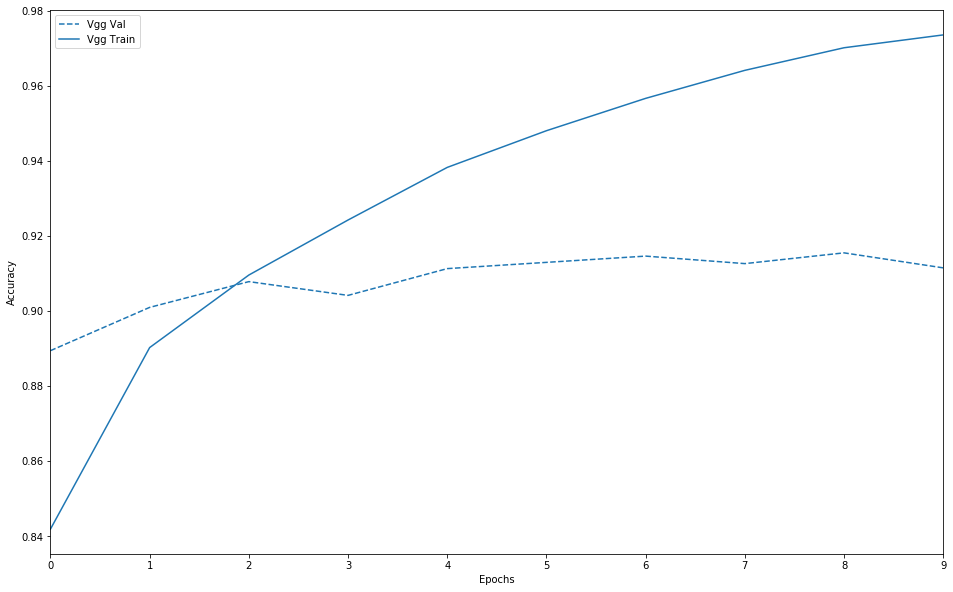

In [22]:
plot_history([('vgg', model_vgg_fit)])